<a href="https://colab.research.google.com/github/howellery/MPM_200_Howell/blob/main/Code/MPM200_Session5_HW_EHowell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPM 200: Assignment 4 (EHowell)

---



### Due 29th October 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

In [ ]:
# utils::installed.packages()

#Commenting out install packages code lines since these packages are already installed for me
#install.packages("tidyverse")
#install.packages("ggplot2")
#install.packages("dplyr")
install.packages("sjPlot")
install.packages("beepr")

#Loading packages
library(tidyverse)
library(ggplot2)
library(dplyr)
library(sjPlot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘effectsize’, ‘bayestestR’, ‘datawizard’, ‘ggeffects’, ‘insight’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘audio’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘sjPlot’


The following object is masked from ‘package:ggplot2’:

    set_theme




**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

In [ ]:
# install package
library(beepr)

#Q0. plays the mario tune
beep(sound = "mario")

Warning message in value[[3L]](cond):
“beep() could not play the sound due to the following error:
Error in play.default(x, rate, ...): no audio drivers are available
”


## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [ ]:
#read the csv file and
data = data = read.csv('Hummingbird_data.csv')

In [ ]:
# List columns and rows
colnames(data)
rownames(data)

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

[1] "1"    "2"    "3"    "4"    "5"    "6"    "7"    "8"    "9"    "10"  
  [11] "11"   "12"   "13"   "14"   "15"   "16"   "17"   "18"   "19"   "20"  
  [21] "21"   "22"   "23"   "24"   "25"   "26"   "27"   "28"   "29"   "30"  
  [31] "31"   "32"   "33"   "34"   "35"   "36"   "37"   "38"   "39"   "40"  
  [41] "41"   "42"   "43"   "44"   "45"   "46"   "47"   "48"   "49"   "50"  
  [51] "51"   "52"   "53"   "54"   "55"   "56"   "57"   "58"   "59"   "60"  
  [61] "61"   "62"   "63"   "64"   "65"   "66"   "67"   "68"   "69"   "70"  
  [71] "71"   "72"   "73"   "74"   "75"   "76"   "77"   "78"   "79"   "80"  
  [81] "81"   "82"   "83"   "84"   "85"   "86"   "87"   "88"   "89"   "90"  
  [91] "91"   "92"   "93"   "94"   "95"   "96"   "97"   "98"   "99"   "100" 
 [101] "101"  "102"  "103"  "104"  "105"  "106"  "107"  "108"  "109"  "110" 
 [111] "111"  "112"  "113"  "114"  "115"  "116"  "117"  "118"  "119"  "120" 
 [121] "121"  "122"  "123"  "124"  "125"  "126"  "127"  "128"  "129"  "130" 
 [131] "131"  "132"  "133"  "134"  "135"  "136"  "137"  "138"  "139"  "140" 
 [141] "141"  "142"  "143"  "144"  "145"  "146"  "147"  "148"  "149"  "150" 
 [151] "151"  "152"  "153"  "154"  "155"  "156"  "157"  "158"  "159"  "160" 
 [161] "161"  "162"  "163"  "164"  "165"  "166"  "167"  "168"  "169"  "170" 
 [171] "171"  "172"  "173"  "174"  "175"  "176"  "177"  "178"  "179"  "180" 
 [181] "181"  "182"  "183"  "184"  "185"  "186"  "187"  "188"  "189"  "190" 
 [191] "191"  "192"  "193"  "194"  "195"  "196"  "197"  "198"  "199"  "200" 
 [201] "201"  "202"  "203"  "204"  "205"  "206"  "207"  "208"  "209"  "210" 
 [211] "211"  "212"  "213"  "214"  "215"  "216"  "217"  "218"  "219"  "220" 
 [221] "221"  "222"  "223"  "224"  "225"  "226"  "227"  "228"  "229"  "230" 
 [231] "231"  "232"  "233"  "234"  "235"  "236"  "237"  "238"  "239"  "240" 
 [241] "241"  "242"  "243"  "244"  "245"  "246"  "247"  "248"  "249"  "250" 
 [251] "251"  "252"  "253"  "254"  "255"  "256"  "257"  "258"  "259"  "260" 
 [261] "261"  "262"  "263"  "264"  "265"  "266"  "267"  "268"  "269"  "270" 
 [271] "271"  "272"  "273"  "274"  "275"  "276"  "277"  "278"  "279"  "280" 
 [281] "281"  "282"  "283"  "284"  "285"  "286"  "287"  "288"  "289"  "290" 
 [291] "291"  "292"  "293"  "294"  "295"  "296"  "297"  "298"  "299"  "300" 
 [301] "301"  "302"  "303"  "304"  "305"  "306"  "307"  "308"  "309"  "310" 
 [311] "311"  "312"  "313"  "314"  "315"  "316"  "317"  "318"  "319"  "320" 
 [321] "321"  "322"  "323"  "324"  "325"  "326"  "327"  "328"  "329"  "330" 
 [331] "331"  "332"  "333"  "334"  "335"  "336"  "337"  "338"  "339"  "340" 
 [341] "341"  "342"  "343"  "344"  "345"  "346"  "347"  "348"  "349"  "350" 
 [351] "351"  "352"  "353"  "354"  "355"  "356"  "357"  "358"  "359"  "360" 
 [361] "361"  "362"  "363"  "364"  "365"  "366"  "367"  "368"  "369"  "370" 
 [371] "371"  "372"  "373"  "374"  "375"  "376"  "377"  "378"  "379"  "380" 
 [381] "381"  "382"  "383"  "384"  "385"  "386"  "387"  "388"  "389"  "390" 
 [391] "391"  "392"  "393"  "394"  "395"  "396"  "397"  "398"  "399"  "400" 
 [401] "401"  "402"  "403"  "404"  "405"  "406"  "407"  "408"  "409"  "410" 
 [411] "411"  "412"  "413"  "414"  "415"  "416"  "417"  "418"  "419"  "420" 
 [421] "421"  "422"  "423"  "424"  "425"  "426"  "427"  "428"  "429"  "430" 
 [431] "431"  "432"  "433"  "434"  "435"  "436"  "437"  "438"  "439"  "440" 
 [441] "441"  "442"  "443"  "444"  "445"  "446"  "447"  "448"  "449"  "450" 
 [451] "451"  "452"  "453"  "454"  "455"  "456"  "457"  "458"  "459"  "460" 
 [461] "461"  "462"  "463"  "464"  "465"  "466"  "467"  "468"  "469"  "470" 
 [471] "471"  "472"  "473"  "474"  "475"  "476"  "477"  "478"  "479"  "480" 
 [481] "481"  "482"  "483"  "484"  "485"  "486"  "487"  "488"  "489"  "490" 
 [491] "491"  "492"  "493"  "494"  "495"  "496"  "497"  "498"  "499"  "500" 
 [501] "501"  "502"  "503"  "504"  "505"  "506"  "507"  "508"  "509"  "510" 
 [511] "511"  "512"  "513"  "514"  "515"  "516"  "517"  "518"  "519"  "520" 

**Q2. How many rows and columns are in the datafame**  
1 point

In [ ]:
# Number of columns and rows
ncol(data)
nrow(data)

# Q2: there are 12 columns and 6908 rows in the data.

[1] 12

[1] 6908

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
* Use the` sapply(`) function with class() to identify the data types of each column
* Discuss any observations or potential issues with the data types.

In [ ]:
# Display the structure of the datafame
str(data)


'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [ ]:
# Identify data types of each column
data_types = sapply(data, class)
print(data_types)

          Admitted Disposition_binary              Place              F_Aid 
       "character"        "character"        "character"        "character" 
         Species_e              Sex_e              Age_e   Brought_in_after 
       "character"        "character"        "character"          "integer" 
            season                  r       Green_Orange                 ID 
       "character"        "character"        "character"        "character" 


Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [ ]:
library(dplyr)
model_data = sample_n(data, 5000)
nrow(model_data)
ncol(model_data)

[1] 5000

[1] 12

**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

There are 5000 rows in the data and 12 columns currently.

**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

Of the 12 variables 11 are characters and 1 is integer format. The admitted values are dates which is a continuous variable, and Brought_in_after is continuous,  but otherwise the other variables are categorical.


**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**



In [ ]:
# Create model_data file
write.csv(model_data, 'Hummingbird_data_ERINHOWELL.csv')

In [ ]:
# load ggplot2 library
library(ggplot2)

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [ ]:
# New dataframe containing summary of subset data based on rehab
rehab = model_data%>% # model_data is passed to group_by function
group_by(Place)%>% # data is grouped by Place (rehab) and then passed to summarise
summarise(count = n_distinct(ID)) # summarise creates a count of distinct values in each "Place" group

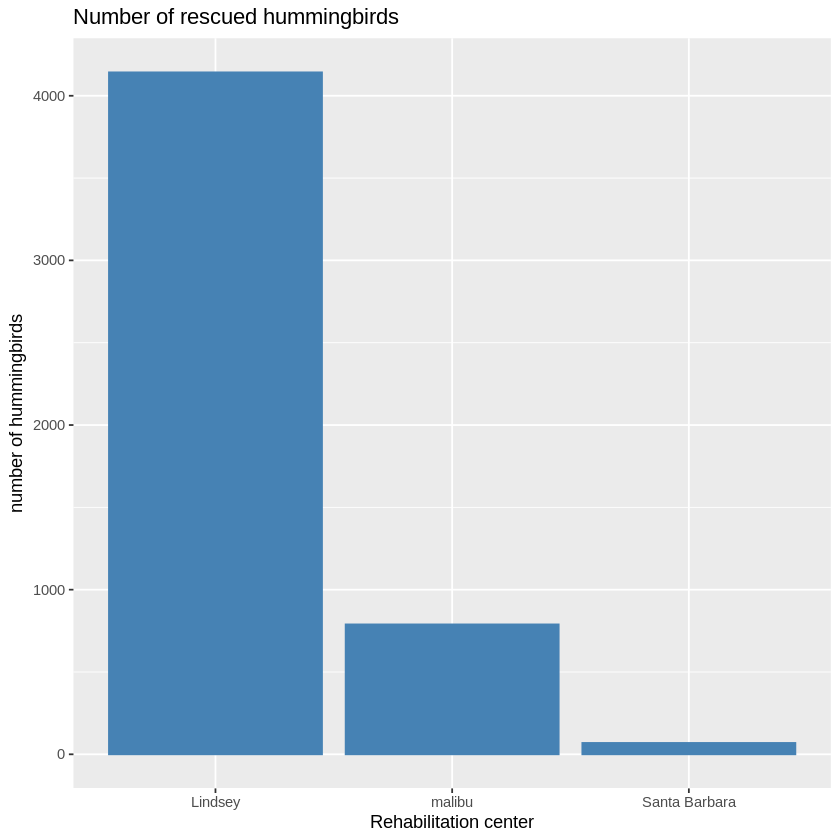

In [ ]:
# histogram of hummingbirds by rehab
p = ggplot(rehab, aes(x = Place, y = count)) + # ggplot takes the grouped data then considers Place on x and count on y
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+ # geombar specifies that the plot should be a bar plot,
# stat="identity" means that we already specified the y values and the color and fill dictate the appearance of the bar borders and fills
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+ # xlab specifies the text for the x axis label, ylab specifies the text for the y label
labs(title = "Number of rescued hummingbirds") #labs manipulates labels including the chart title which is specified in this line
ggsave("humming_ERINHOWELL.pdf", width = 4, height = 3) # ggsave creates a new file of the plot with specified width and height
p # calls the plot so that it is displayed

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

A: See comments. The rehab object contains the dataframe passed through a grouping function (by Place) and summarising function that counts the values in each group. The rehab dataframe is then used to create a bar plot of hummingbird counts by rehab location using ggplot function which specifies the data, x values, and y values, then the geom_bar function which tells the code how the plot should appear, and the xlab, ylab, and labs functions which specify x, y, and title text respectively. The plot is then saved at a specific size with ggsave.

# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

In [ ]:
# 5 covariates that might affect survival:
# - reason for admit (r)
# - treatment (F_Aid)
# - species (Species_e)
# - animal sex (Sex_e)
# - animal age (Age_e)

#table of reason for admission and outcome (disposition_binary) and the unique number of the hummingbirds
outcomebyadmit <- model_data %>% group_by(r, Disposition_binary)%>% summarize(count = n_distinct(ID))

#table of treatment and outcome (disposition_binary) and the unique number of the hummingbirds
outcomebytreat = model_data%>% group_by(F_Aid, Disposition_binary)%>% summarize(count = n_distinct(ID))

#table of species and outcome (disposition_binary) and the unique number of the hummingbirds
outcomebyspecies = model_data%>% group_by(Species_e, Disposition_binary)%>% summarize(count = n_distinct(ID))

#table of sex and outcome (disposition_binary) and the unique number of the hummingbirds
outcomebysex = model_data%>% group_by(Sex_e, Disposition_binary)%>% summarize(count = n_distinct(ID))

#table of age and outcome (disposition_binary) and the unique number of the hummingbirds
outcomebyage = model_data%>% group_by(Age_e, Disposition_binary)%>% summarize(count = n_distinct(ID))



`summarise()` has grouped output by 'r'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'F_Aid'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Species_e'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Sex_e'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Age_e'. You can override using the
`.groups` argument.


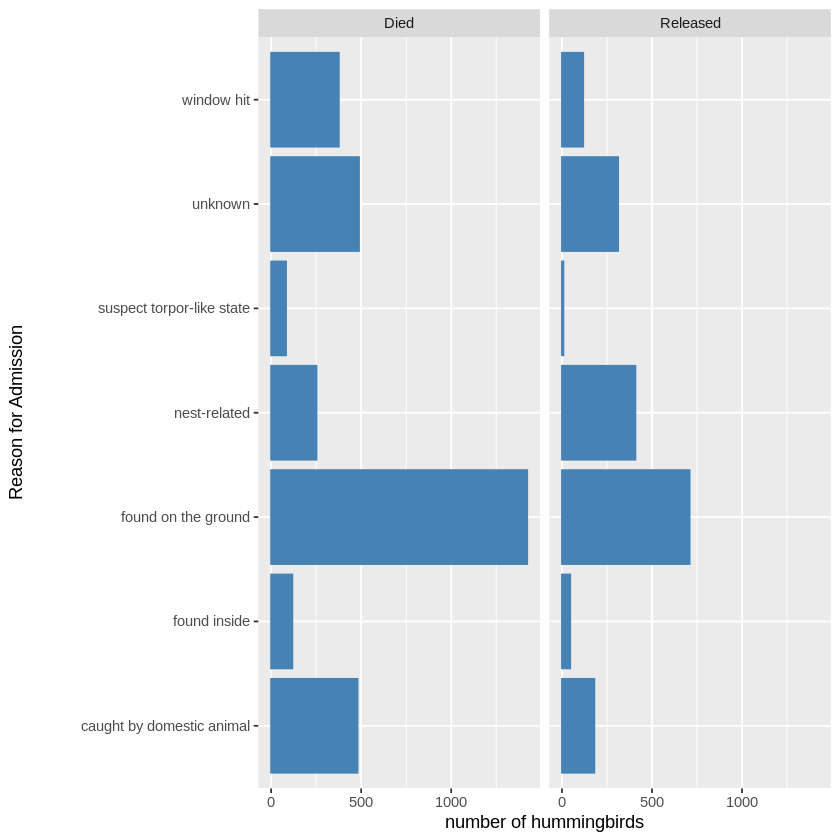

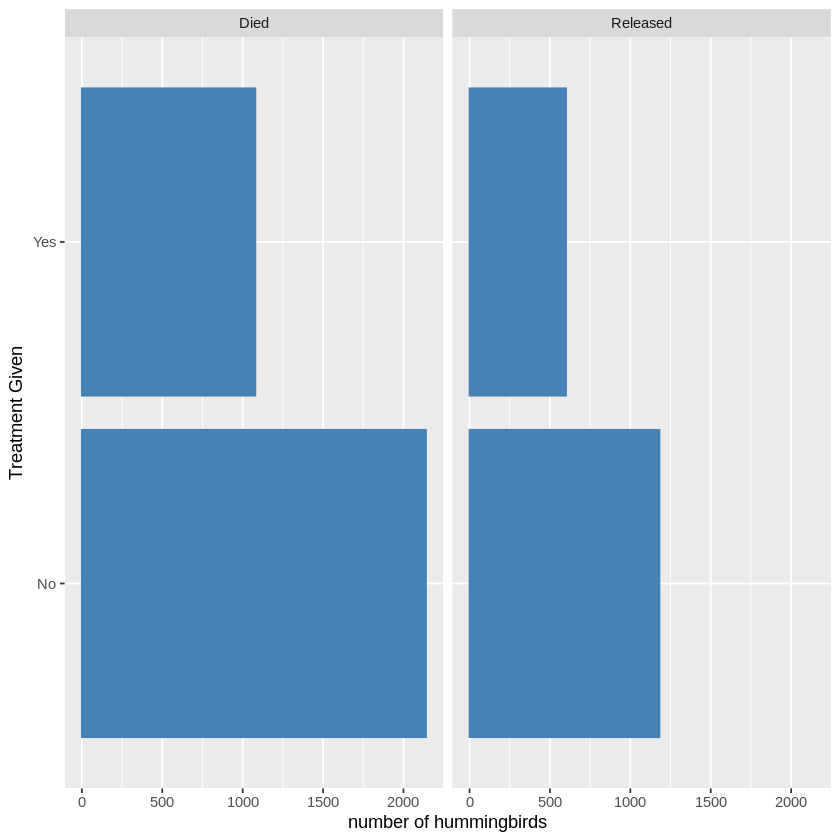

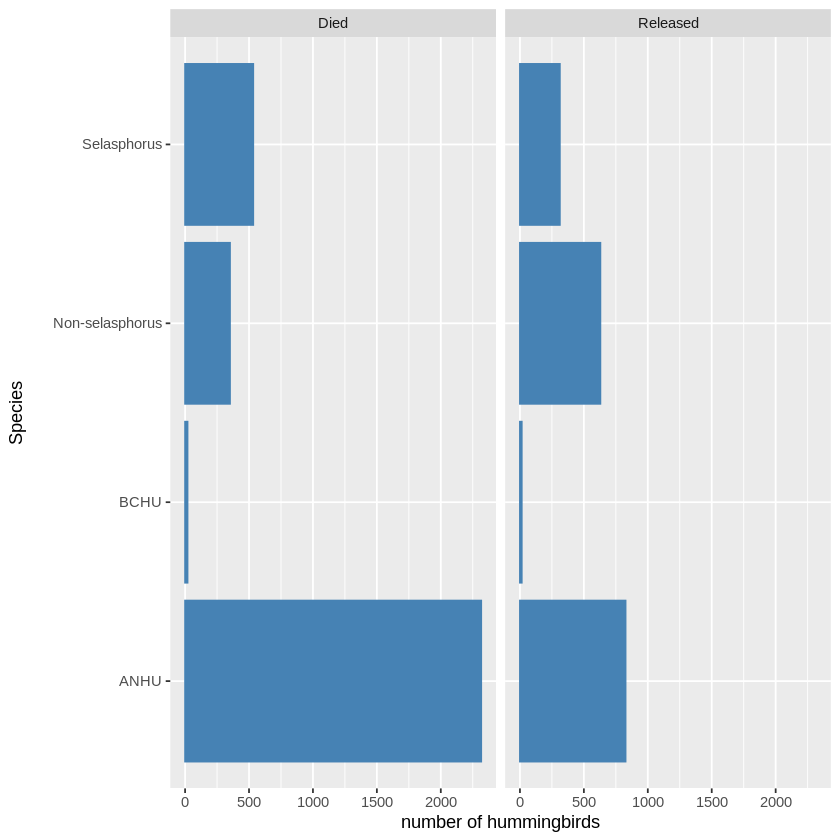

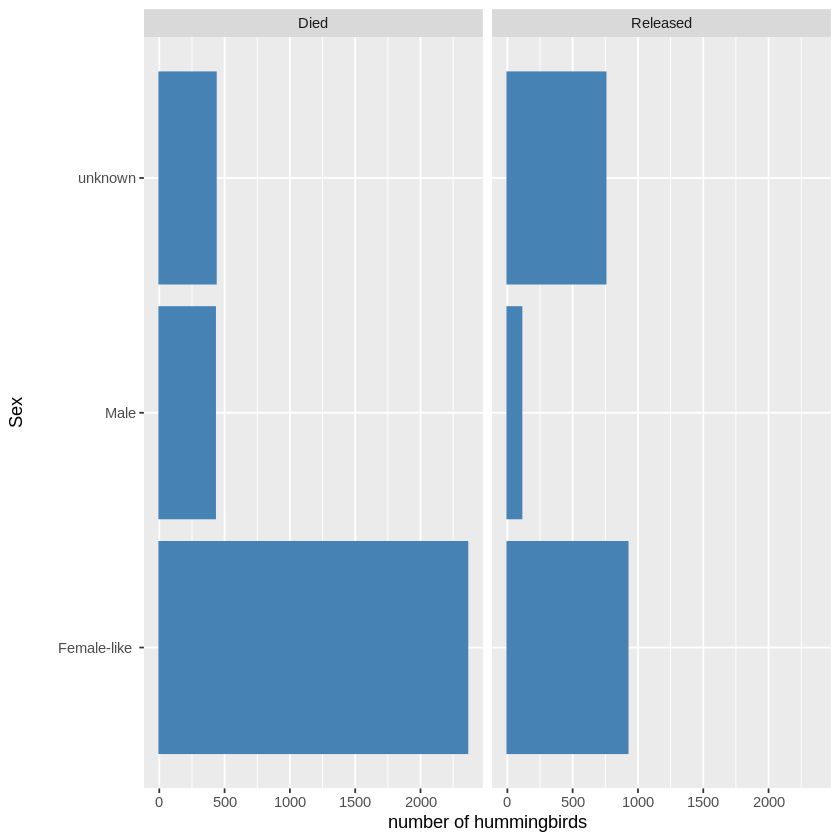

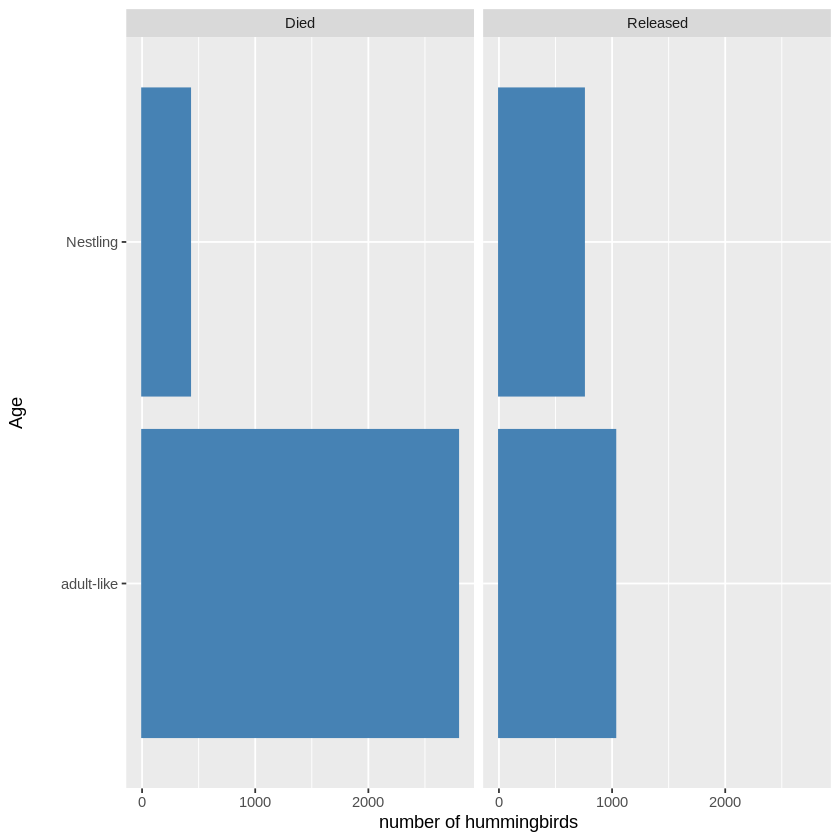

In [ ]:
# plots of covariates and outcomes

p_admit <- ggplot(outcomebyadmit, aes(x = r, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue') + facet_grid(. ~ Disposition_binary)+ coord_flip() +
xlab('Reason for Admission')+ ylab('number of hummingbirds')
p_admit

p_treat <- ggplot(outcomebytreat, aes(x = F_Aid, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue') + facet_grid(. ~ Disposition_binary)+ coord_flip() +
xlab('Treatment Given')+ ylab('number of hummingbirds')
p_treat

p_species <- ggplot(outcomebyspecies, aes(x = Species_e, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue') + facet_grid(. ~ Disposition_binary)+ coord_flip() +
xlab('Species')+ ylab('number of hummingbirds')
p_species

p_sex <- ggplot(outcomebysex, aes(x = Sex_e, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue') + facet_grid(. ~ Disposition_binary)+ coord_flip() +
xlab('Sex')+ ylab('number of hummingbirds')
p_sex

p_age <- ggplot(outcomebyage, aes(x = Age_e, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue') + facet_grid(. ~ Disposition_binary)+ coord_flip() +
xlab('Age')+ ylab('number of hummingbirds')
p_age

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

A: Based on the tables and plots, some reasons for admission, species identities, sexes, and ages, may have higher likelihood of release. In terms of admission, "unknown reason", "nest-related", and "found inside" appeared to have a high proportion of release. Non-selaphorus species were also more likely to be released than die. Birds of unknown sex classification and nestling birds were more likely to be released than die as well. Whether treatment was given or not appeared to have equal likelihood of release, however there are many potential confounds including the reason for admission.

I'd like to calculate odds ratios and other statistical measures to test the signficance of association between the covariates and the outcome.

Q9: Missing

## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
* Create a table showing the proportions for each rehabilitation center (denoted by column `Place`).
* Plot a bar chart to visualize these proportions.

`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


# A tibble: 6 × 4
# Groups:   Place [3]
  Place         Disposition_binary count proportion
  <chr>         <chr>              <int>      <dbl>
1 Lindsey       Died                2683      0.648
2 Lindsey       Released            1459      0.352
3 Santa Barbara Died                  39      0.565
4 Santa Barbara Released              30      0.435
5 malibu        Died                 497      0.630
6 malibu        Released             292      0.370


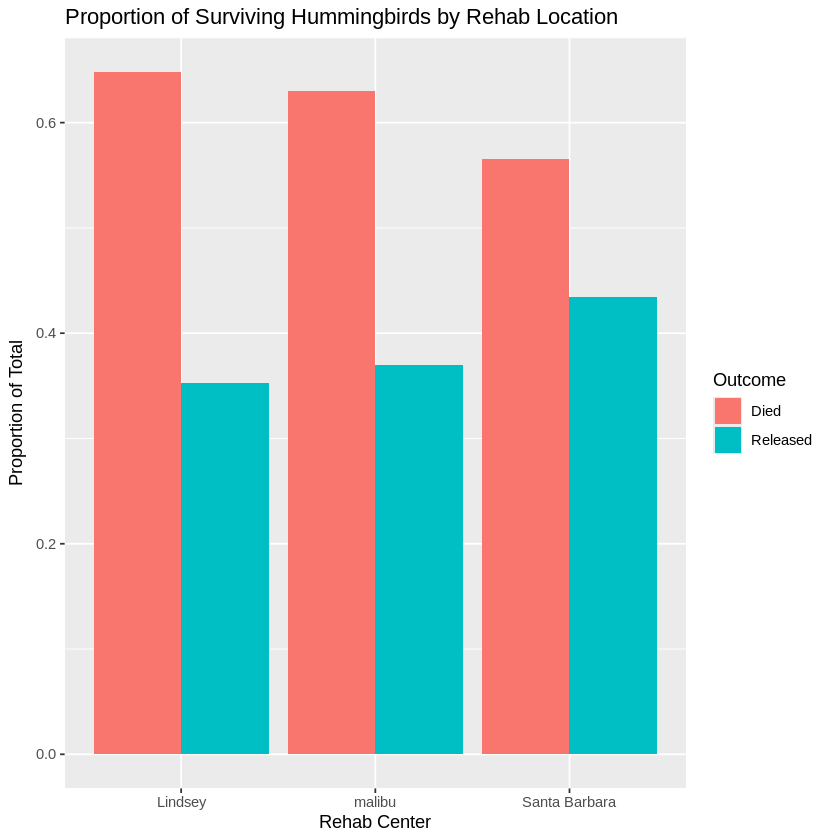

In [ ]:
# Calculate proportions
proportions = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID)) %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))

# Print the list of proportions
print(proportions)

# Plot the proportions
ggplot(proportions, aes(x = Place, y = proportion, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Rehab Center") +
  ylab("Proportion of Total") +
  labs(title = "Proportion of Surviving Hummingbirds by Rehab Location", fill = "Outcome")

### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

                 
                  ANHU BCHU Non-selasphorus Selasphorus
  Non-Selasphorus 3142   33             980           0
  Selasphorus        0    0               0         845

`summarise()` has grouped output by 'Species_group'. You can override using the
`.groups` argument.


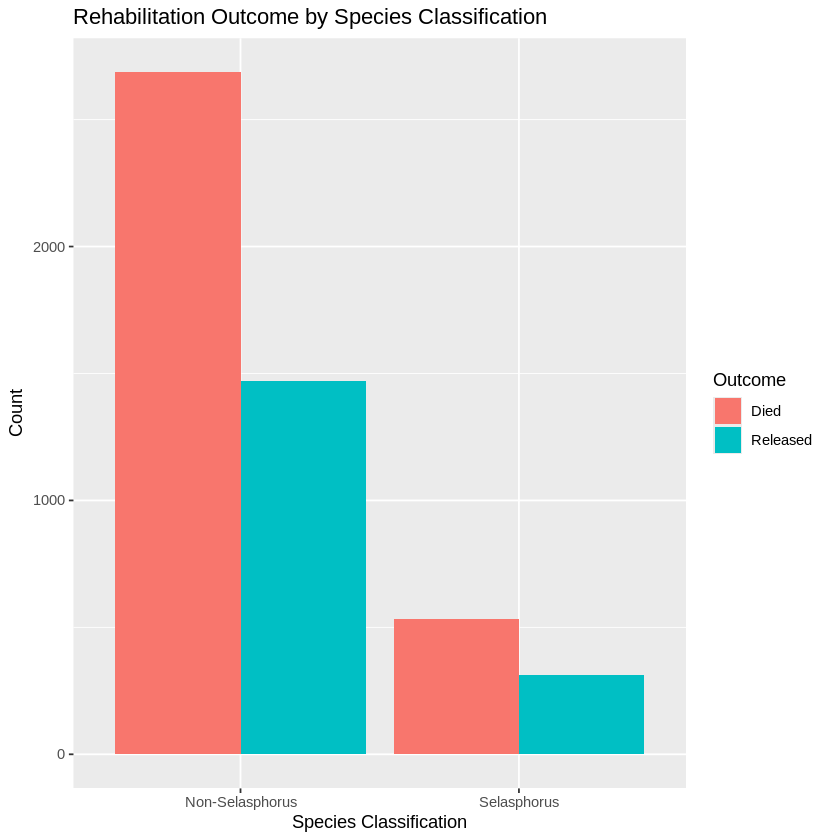

In [ ]:
## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?

model_data$Species_group = ifelse(model_data$Species_e == "Selasphorus", "Selasphorus",
                                  "Non-Selasphorus")

# Display new variable in a table to check classification assignment
table(model_data$Species_group, model_data$Species_e)

# Tabulate and plot the distribution
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

# Plot outcome by species class
ggplot(species_distribution, aes(x = Species_group, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Species Classification") +
  ylab("Count") +
  labs(title = "Rehabilitation Outcome by Species Classification", fill = "Outcome")

A: Although there were more overall non-selaphorus admissions and releases than selaphorus admissions and releases, a greater proportion of the Selasphorus hummingbirds were released than the Non-selasphorus.

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
* Summarize the trend of hummingbird admissions over time
* Plot the trend using `ggplot2`.

In [ ]:
# Convert variable Admitted to date format
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y")


Q12a Please explain the argument `format` in code above

A: In the code above, the argument format indicates the pattern that the values in the Admitted column follow. The argument indicates that the values can be separated into month, then day, then year with the pattern %m/%d/%Y. Slashes signify the breaks between values.  

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [ ]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%Y-%m")) %>%
  group_by(Admitted_month, Species_group) %>%
  summarise(count = n_distinct(ID))

admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Admitted_month'. You can override using
the `.groups` argument.


Finally, we can use `ggplot` to plot these timelines.

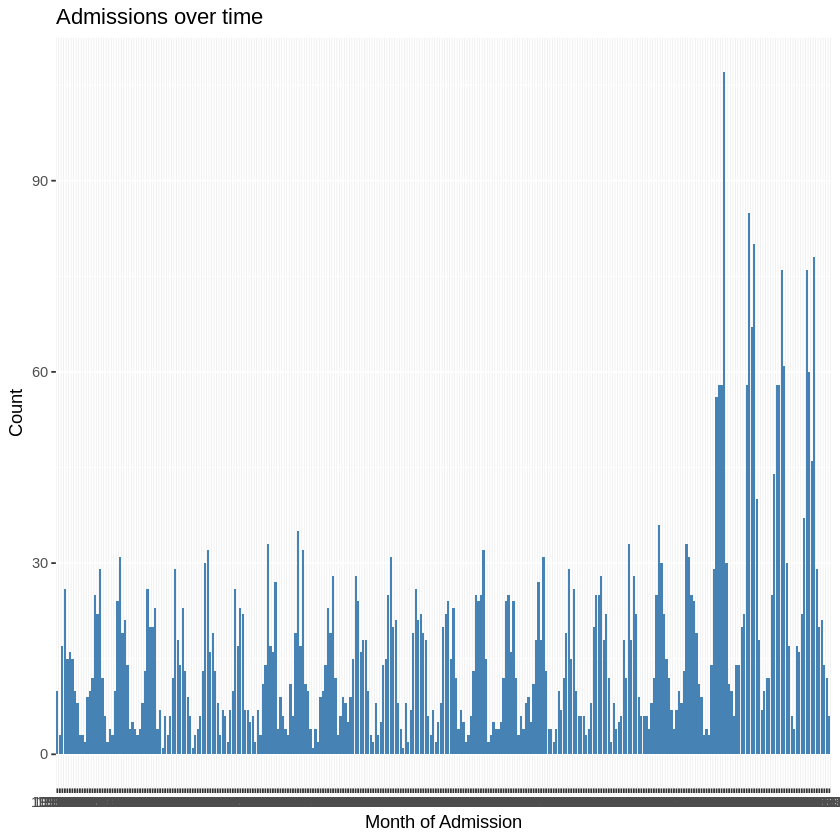

In [ ]:
# Plot admissions by month
p_month = ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  xlab("Month of Admission") +
  ylab("Count") +
  labs(title = "Admissions over time")
ggsave("admissions_ERINHOWELL.pdf", width = 14, height = 3)
p_month


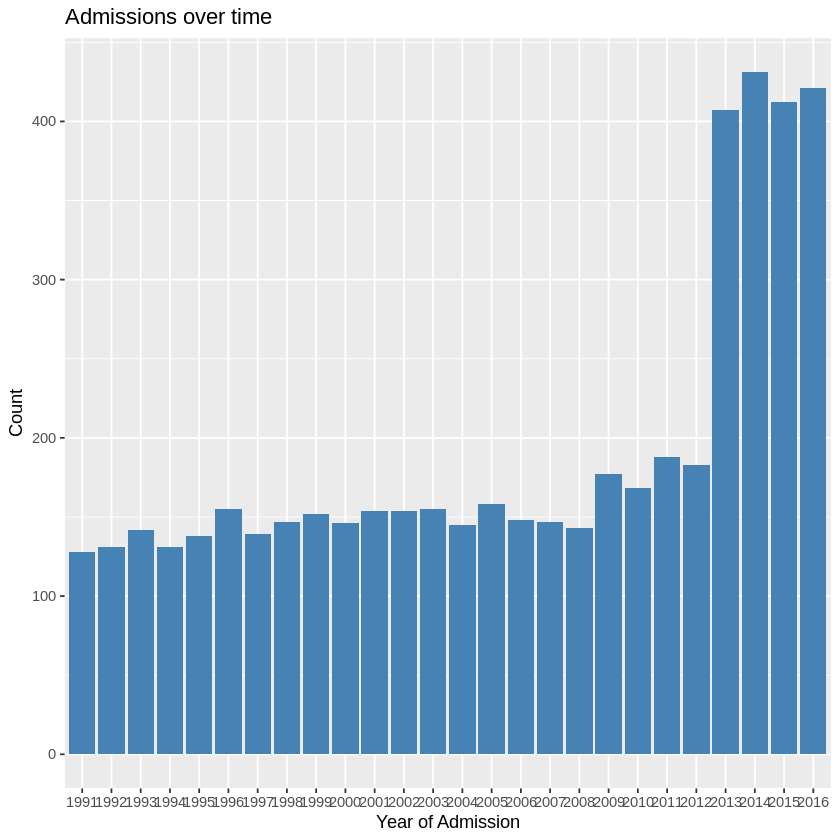

In [ ]:
## Plot similar timeline for Yearly admissions of Hummingbirds

# Plot admissions by year
p_month = ggplot(admissions_by_year, aes(x = Admitted_year, y = count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  xlab("Year of Admission") +
  ylab("Count") +
  labs(title = "Admissions over time")
p_month

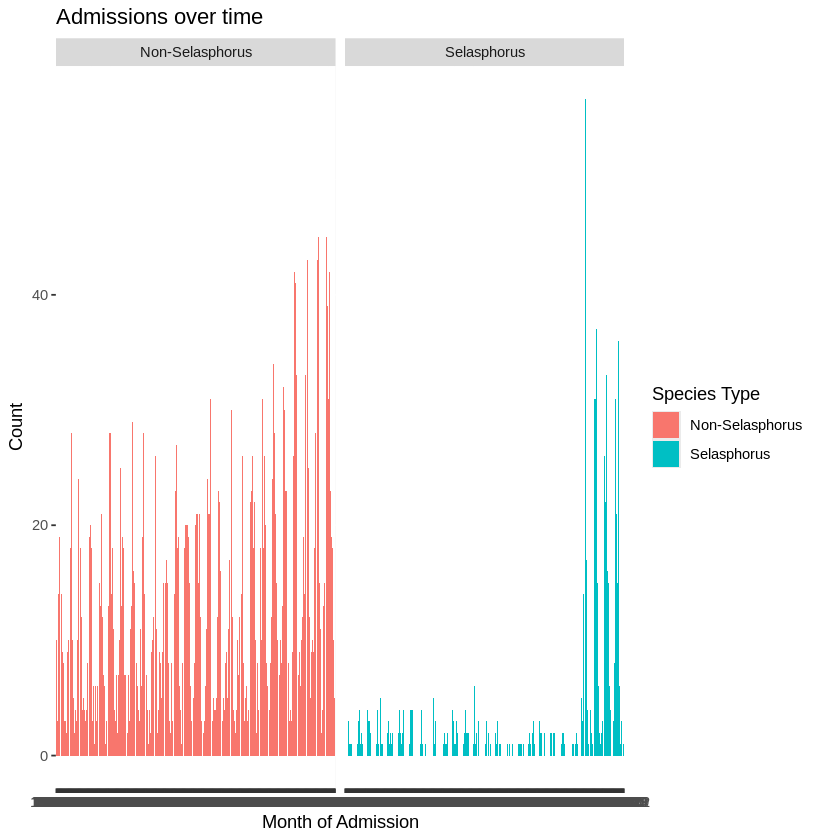

In [ ]:
# Modify Code for Visualization: differentiate between species groups

# Plot admissions by month
p_month2 = ggplot(admissions_by_month, aes(x = Admitted_month, y = count, fill = Species_group)) +
  geom_bar(stat = "identity", position = "dodge") + facet_grid(. ~ Species_group)+
  xlab("Month of Admission") +
  ylab("Count") +
  labs(title = "Admissions over time", fill = "Species Type")
ggsave("admissions_ERINHOWELL.pdf", width = 14, height = 3)
p_month2


# Section 4: Running full model and model selection

    1. Complete the code and fit a full model



In [46]:
model_data$Disposition_group = ifelse(model_data$Disposition_binary == "Released", 1, 0)

fullmodel  = glm(Disposition_group ~ r + Green_Orange + season+F_Aid+Species_e, data = model_data, family= binomial(link = logit))
fullmodel

summary(fullmodel)


Call:  glm(formula = Disposition_group ~ r + Green_Orange + season + 
    F_Aid + Species_e, family = binomial(link = logit), data = model_data)

Coefficients:
                 (Intercept)                 rfound inside  
                   -1.973066                      0.171320  
        rfound on the ground                 rnest-related  
                    0.090153                      0.647152  
  rsuspect torpor-like state                      runknown  
                   -1.222506                      0.343628  
                 rwindow hit  Green_OrangeSelasphorus spp.  
                   -0.008934                      0.242947  
                seasonSpring                  seasonSummer  
                    1.084434                      0.990576  
                seasonWinter                      F_AidYes  
                    0.533182                     -0.022112  
               Species_eBCHU      Species_eNon-selasphorus  
                    0.537149                  


Call:
glm(formula = Disposition_group ~ r + Green_Orange + season + 
    F_Aid + Species_e, family = binomial(link = logit), data = model_data)

Coefficients: (1 not defined because of singularities)
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -1.973066   0.161867 -12.189  < 2e-16 ***
rfound inside                 0.171320   0.198697   0.862  0.38857    
rfound on the ground          0.090153   0.102635   0.878  0.37974    
rnest-related                 0.647152   0.132013   4.902 9.48e-07 ***
rsuspect torpor-like state   -1.222506   0.382515  -3.196  0.00139 ** 
runknown                      0.343628   0.119559   2.874  0.00405 ** 
rwindow hit                  -0.008934   0.140535  -0.064  0.94931    
Green_OrangeSelasphorus spp.  0.242947   0.087536   2.775  0.00551 ** 
seasonSpring                  1.084434   0.148814   7.287 3.17e-13 ***
seasonSummer                  0.990576   0.152134   6.511 7.45e-11 ***
seasonWinter      

2. use following command with full model to do stepwise model selection

In [ ]:
backward_model = step(fullmodel,k=2,direction = "backward",test="Chisq")

Start:  AIC=5934.22
Disposition_group ~ r + Green_Orange + season + F_Aid + Species_e


Step:  AIC=5934.22
Disposition_group ~ r + season + F_Aid + Species_e

            Df Deviance    AIC     LRT  Pr(>Chi)    
- F_Aid      1   5906.3 5932.3   0.108     0.742    
<none>           5906.2 5934.2                      
- r          6   5963.6 5979.6  57.391 1.523e-10 ***
- season     3   5990.3 6012.3  84.097 < 2.2e-16 ***
- Species_e  3   6102.1 6124.1 195.862 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step:  AIC=5932.33
Disposition_group ~ r + season + Species_e

            Df Deviance    AIC     LRT  Pr(>Chi)    
<none>           5906.3 5932.3                      
- r          6   5963.9 5977.9  57.547 1.415e-10 ***
- season     3   5990.4 6010.4  84.027 < 2.2e-16 ***
- Species_e  3   6102.2 6122.2 195.900 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
forward_model = step(fullmodel,k=2,direction = ,test="Chisq")

Start:  AIC=5934.22
Disposition_group ~ r + Green_Orange + season + F_Aid + Species_e


Step:  AIC=5934.22
Disposition_group ~ r + season + F_Aid + Species_e

            Df Deviance    AIC     LRT  Pr(>Chi)    
- F_Aid      1   5906.3 5932.3   0.108     0.742    
<none>           5906.2 5934.2                      
- r          6   5963.6 5979.6  57.391 1.523e-10 ***
- season     3   5990.3 6012.3  84.097 < 2.2e-16 ***
- Species_e  3   6102.1 6124.1 195.862 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step:  AIC=5932.33
Disposition_group ~ r + season + Species_e

            Df Deviance    AIC     LRT  Pr(>Chi)    
<none>           5906.3 5932.3                      
- r          6   5963.9 5977.9  57.547 1.415e-10 ***
- season     3   5990.4 6010.4  84.027 < 2.2e-16 ***
- Species_e  3   6102.2 6122.2 195.900 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Section 5: explore the glm object

In [ ]:
names(backward_model)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          
[31] "anova"

Q1: How many model properties are available?

There are 31 model properties available


explore individual attributes of the fitted model and read about it in the R documentation

In [49]:
library(sjPlot)

tab_model(backward_model)

summary(backward_model)
summary(forward_model)
summary(fullmodel)




Call:
glm(formula = Disposition_group ~ r + season + Species_e, family = binomial(link = logit), 
    data = model_data)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.980101   0.160474 -12.339  < 2e-16 ***
rfound inside               0.172070   0.198682   0.866  0.38646    
rfound on the ground        0.088287   0.102484   0.861  0.38898    
rnest-related               0.646338   0.131989   4.897 9.74e-07 ***
rsuspect torpor-like state -1.222839   0.382509  -3.197  0.00139 ** 
runknown                    0.345206   0.119466   2.890  0.00386 ** 
rwindow hit                -0.007606   0.140481  -0.054  0.95682    
seasonSpring                1.084490   0.148815   7.287 3.16e-13 ***
seasonSummer                0.990589   0.152133   6.511 7.45e-11 ***
seasonWinter                0.534159   0.165018   3.237  0.00121 ** 
Species_eBCHU               0.536945   0.360259   1.490  0.13611    
Species_eNon-selasphorus    1.22529


Call:
glm(formula = Disposition_group ~ r + season + Species_e, family = binomial(link = logit), 
    data = model_data)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.980101   0.160474 -12.339  < 2e-16 ***
rfound inside               0.172070   0.198682   0.866  0.38646    
rfound on the ground        0.088287   0.102484   0.861  0.38898    
rnest-related               0.646338   0.131989   4.897 9.74e-07 ***
rsuspect torpor-like state -1.222839   0.382509  -3.197  0.00139 ** 
runknown                    0.345206   0.119466   2.890  0.00386 ** 
rwindow hit                -0.007606   0.140481  -0.054  0.95682    
seasonSpring                1.084490   0.148815   7.287 3.16e-13 ***
seasonSummer                0.990589   0.152133   6.511 7.45e-11 ***
seasonWinter                0.534159   0.165018   3.237  0.00121 ** 
Species_eBCHU               0.536945   0.360259   1.490  0.13611    
Species_eNon-selasphorus    1.22529


Call:
glm(formula = Disposition_group ~ r + Green_Orange + season + 
    F_Aid + Species_e, family = binomial(link = logit), data = model_data)

Coefficients: (1 not defined because of singularities)
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -1.973066   0.161867 -12.189  < 2e-16 ***
rfound inside                 0.171320   0.198697   0.862  0.38857    
rfound on the ground          0.090153   0.102635   0.878  0.37974    
rnest-related                 0.647152   0.132013   4.902 9.48e-07 ***
rsuspect torpor-like state   -1.222506   0.382515  -3.196  0.00139 ** 
runknown                      0.343628   0.119559   2.874  0.00405 ** 
rwindow hit                  -0.008934   0.140535  -0.064  0.94931    
Green_OrangeSelasphorus spp.  0.242947   0.087536   2.775  0.00551 ** 
seasonSpring                  1.084434   0.148814   7.287 3.17e-13 ***
seasonSummer                  0.990576   0.152134   6.511 7.45e-11 ***
seasonWinter      

Answer these questions:

Q2: Which variable has the highest odds ratio for survival?

The species: Non-selasphorus has the highest odds ratio for survival (1.225247).

Q3: Do the calculated odds ratios match the values provided by sjPlot?

The calculated odds ratios are almost the same as the values provided by sjPlot
